In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import sys
import torchvision.datasets as dset
DEVICE = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [12]:
import torchvision.transforms as transforms
### code inspired by https://zhuanlan.zhihu.com/p/322046843
batch_size = 64
input_size = 32
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std),
])

In [13]:
train_data=dset.CIFAR10(root='/home/yifan/projects/contrast-visualization/Training/PyTorch_CIFAR10/data',train=True,transform=transform)
test_data=dset.CIFAR10(root='/home/yifan/projects/contrast-visualization/Training/PyTorch_CIFAR10/data',train=False,transform=transform)
train_loader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=True)
test_loader_1=torch.utils.data.DataLoader(test_data,batch_size=1,shuffle=True) # used for adversarial attack
n_train=len(train_data)
n_test=len(test_data)
classes = train_data.classes

In [46]:
dataset_1 = torch.utils.data.DataLoader(train_data,batch_size=1,shuffle=False) # used for adversarial attack

In [49]:
for i, (images, labels) in enumerate(train_data):
    print('i', i, labels)

i 0 6
i 1 9
i 2 9
i 3 4
i 4 1
i 5 1
i 6 2
i 7 7
i 8 8
i 9 3
i 10 4
i 11 7
i 12 7
i 13 2
i 14 9
i 15 9
i 16 9
i 17 3
i 18 2
i 19 6
i 20 4
i 21 3
i 22 6
i 23 6
i 24 2
i 25 6
i 26 3
i 27 5
i 28 4
i 29 0
i 30 0
i 31 9
i 32 1
i 33 3
i 34 4
i 35 0
i 36 3
i 37 7
i 38 3
i 39 3
i 40 5
i 41 2
i 42 2
i 43 7
i 44 1
i 45 1
i 46 1
i 47 2
i 48 2
i 49 0
i 50 9
i 51 5
i 52 7
i 53 9
i 54 2
i 55 2
i 56 5
i 57 2
i 58 4
i 59 3
i 60 1
i 61 1
i 62 8
i 63 2
i 64 1
i 65 1
i 66 4
i 67 9
i 68 7
i 69 8
i 70 5
i 71 9
i 72 6
i 73 7
i 74 3
i 75 1
i 76 9
i 77 0
i 78 3
i 79 1
i 80 3
i 81 5
i 82 4
i 83 5
i 84 7
i 85 7
i 86 4
i 87 7
i 88 9
i 89 4
i 90 2
i 91 3
i 92 8
i 93 0
i 94 1
i 95 6
i 96 1
i 97 1
i 98 4
i 99 1
i 100 8
i 101 3
i 102 9
i 103 6
i 104 6
i 105 1
i 106 8
i 107 5
i 108 2
i 109 9
i 110 9
i 111 8
i 112 1
i 113 7
i 114 7
i 115 0
i 116 0
i 117 6
i 118 9
i 119 1
i 120 2
i 121 2
i 122 9
i 123 2
i 124 6
i 125 6
i 126 1
i 127 9
i 128 5
i 129 0
i 130 4
i 131 7
i 132 6
i 133 7
i 134 1
i 135 8
i 136 1
i 137 1
i 138 

KeyboardInterrupt: 

In [41]:
for i, (images, labels) in enumerate(dataset_1):
    print('i', i, labels)

i 0 tensor([0])
i 1 tensor([8])
i 2 tensor([8])
i 3 tensor([0])
i 4 tensor([4])
i 5 tensor([4])
i 6 tensor([4])
i 7 tensor([1])
i 8 tensor([4])
i 9 tensor([6])
i 10 tensor([6])
i 11 tensor([6])
i 12 tensor([6])
i 13 tensor([8])
i 14 tensor([1])
i 15 tensor([9])
i 16 tensor([1])
i 17 tensor([4])
i 18 tensor([0])
i 19 tensor([5])
i 20 tensor([4])
i 21 tensor([8])
i 22 tensor([3])
i 23 tensor([2])
i 24 tensor([1])
i 25 tensor([7])
i 26 tensor([9])
i 27 tensor([0])
i 28 tensor([4])
i 29 tensor([6])
i 30 tensor([3])
i 31 tensor([5])
i 32 tensor([7])
i 33 tensor([0])
i 34 tensor([1])
i 35 tensor([1])
i 36 tensor([2])
i 37 tensor([2])
i 38 tensor([7])
i 39 tensor([8])
i 40 tensor([2])
i 41 tensor([4])
i 42 tensor([9])
i 43 tensor([3])
i 44 tensor([2])
i 45 tensor([8])
i 46 tensor([9])
i 47 tensor([9])
i 48 tensor([9])
i 49 tensor([7])
i 50 tensor([4])
i 51 tensor([0])
i 52 tensor([2])
i 53 tensor([6])
i 54 tensor([6])
i 55 tensor([2])
i 56 tensor([2])
i 57 tensor([0])
i 58 tensor([3])
i 59 te

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Image'

In [37]:
images, labels = dataset_1

ValueError: too many values to unpack (expected 2)

In [22]:
targets = np.array(train_data.targets)

In [51]:
train_data.data.shape


(50000, 32, 32, 3)

In [23]:
targets

array([6, 9, 9, ..., 9, 1, 1])

In [25]:
targets.shape[0]


50000

In [26]:
import random
num_samples = targets.shape[0]
num_attacks = int(0.1 * num_samples)
attack_indicates = random.sample(range(num_samples), num_attacks)

In [28]:
train_data[attack_indicates]

TypeError: list indices must be integers or slices, not list

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def unnormalize(img, mean = np.array(norm_mean), std = np.array(norm_std)):
  '''
   unnormalize the image that has been normalized with mean and std
  '''
  inverse_mean = - mean/std
  inverse_std = 1/std
  img = transforms.Normalize(mean=-mean/std, std=1/std)(img)
  return img

def normalize(img, mean = np.array(norm_mean), std = np.array(norm_std)):
  return transforms.Normalize(mean = norm_mean, std = norm_std)(img)
     

In [16]:

def imshow(img, label):
    img = unnormalize(img)     # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(classes[label])
    plt.show()

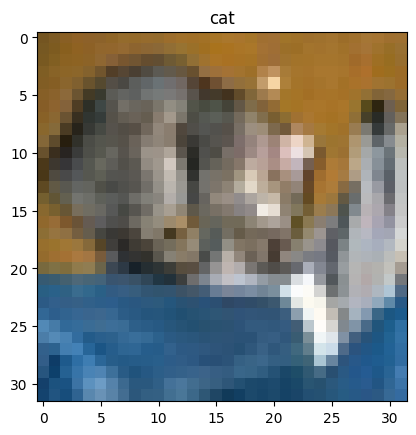

In [17]:
# get some random training images
image, label = test_data[0][0], test_data[0][1]

# show images
imshow(image, label)

In [18]:

def get_num_correct(out, labels):  #求准确率
    return out.argmax(dim=1).eq(labels).sum().item()

In [ ]:
tar_model_path = '/home/yifan/dataset/resnet18_init/pairflip/cifar10/0'
sys.path.append(tar_model_path)
import Model.model as subject_model
model = eval("subject_model.{}()".format('resnet18'))
model_location = os.path.join(tar_model_path, "Model", "Epoch_{:d}".format(200), "subject_model.pth")
model.load_state_dict(torch.load(model_location, map_location=torch.device("cpu")))
model.to(DEVICE)
model.eval()

In [21]:
test_accuracy = 0
with torch.no_grad():
  for (images,labels) in test_loader:
      images,labels = images.to(DEVICE),labels.to(DEVICE)
      outs = model(images)
      test_accuracy += get_num_correct(outs,labels)
test_accuracy /= n_test
print(f"Accuracy of the trained resnet model: {(100*test_accuracy):>0.1f}%")

Accuracy of the trained resnet model: 89.4%


Predicted: "3", Actual: "3"


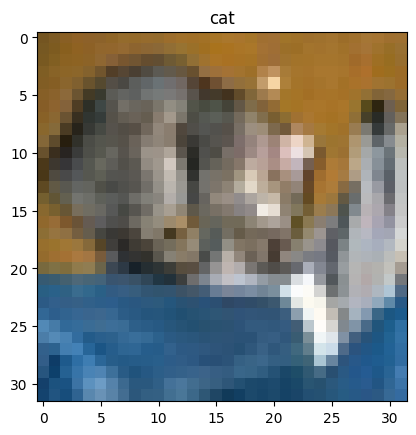

In [63]:
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = torch.unsqueeze(x, dim=0).float().to(DEVICE)
    pred = model(x)
    predicted, actual = pred[0].argmax(0), y
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    x = x.squeeze().cpu()
    imshow(x, predicted)

In [56]:
def fgsm_attack(image, epsilon, data_grad):
  if epsilon == 0:
    return image
  else:
    image = unnormalize(image)
    pertubed_image = image + epsilon*data_grad.sign()
    pertubed_image = torch.clamp(pertubed_image,0,1)
    pertubed_image = transforms.Normalize(mean = norm_mean, std = norm_std)(pertubed_image)
    return pertubed_image.float()

def fgsm_test(model, data_loader, epsilon, n_examples):
  '''
  input: 
    data_loader: data set, batch size = 1
    epsilon: parameter to perform fgsm attack
  return:
    final_acc: accuracy of the model on classifying adversarial examples created based on datas
    adv_examples: n_examples examples of successed adversrial examples
  '''
  print('Epsilon:', epsilon)
  print('-' * 10)
  correct = 0
  adv_examples = []
  # Loop over all examples in data set, data shape: (C, H, W)
  for i, (data, target) in enumerate(data_loader):

      if i>0 and i%1000 == 0:
        current_acc = correct/i
        print(f'Test Accuracy = {current_acc:.4f} [{i:>5d} / {len(data_loader):>5d}]')

      # Send the data and label to the device
      data, target = data.to(DEVICE), target.to(DEVICE)

      # Set requires_grad attribute of tensor. Important for Attack
      data.requires_grad = True

      # Forward pass the data through the model
      output = model(data)
      init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      # If the initial prediction is wrong, dont bother attacking, just move on
      if init_pred.item() != target.item():
          continue

      # Calculate the loss
      loss = F.nll_loss(output, target)

      # Zero all existing gradients
      model.zero_grad()

      # Calculate gradients of model in backward pass
      loss.backward()

      # Collect datagrad
      data_grad = data.grad.data

      # Call FGSM Attack
      perturbed_data = fgsm_attack(data, epsilon, data_grad)

      # Re-classify the perturbed image
      output = model(perturbed_data)

      # Check for success
      final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
      if final_pred.item() == target.item():
          correct += 1
          # Special case for saving 0 epsilon examples
          if (epsilon == 0) and (len(adv_examples) < n_examples):
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      else:
          # Save some adv examples for visualization later
          if len(adv_examples) < n_examples:
              adv_ex = perturbed_data.squeeze().detach().cpu()
              ori_ex = data.squeeze().detach().cpu()
              adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex, ori_ex) )
      


  # Calculate final accuracy for this epsilon
  final_acc = correct/float(len(data_loader))
  print("Epsilon: {}\tTest Accuracy = {} / {} = {} \n".format(epsilon, correct, len(data_loader), final_acc))

  # Return the accuracy and an adversarial example
  return final_acc, adv_examples
     

In [73]:
epsilons = [0.1,0.2,0.3]
n_examples = 5
examples = []
accuracies = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = fgsm_test(model, test_loader_1, eps, n_examples)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0.1
----------
Test Accuracy = 0.0440 [ 1000 / 10000]
Test Accuracy = 0.0490 [ 2000 / 10000]
Test Accuracy = 0.0470 [ 3000 / 10000]
Test Accuracy = 0.0457 [ 4000 / 10000]
Test Accuracy = 0.0458 [ 5000 / 10000]
Test Accuracy = 0.0480 [ 6000 / 10000]
Test Accuracy = 0.0473 [ 7000 / 10000]
Test Accuracy = 0.0478 [ 8000 / 10000]
Test Accuracy = 0.0481 [ 9000 / 10000]
Epsilon: 0.1	Test Accuracy = 486 / 10000 = 0.0486 

Epsilon: 0.2
----------
Test Accuracy = 0.0710 [ 1000 / 10000]
Test Accuracy = 0.0755 [ 2000 / 10000]
Test Accuracy = 0.0760 [ 3000 / 10000]
Test Accuracy = 0.0790 [ 4000 / 10000]
Test Accuracy = 0.0818 [ 5000 / 10000]
Test Accuracy = 0.0818 [ 6000 / 10000]
Test Accuracy = 0.0846 [ 7000 / 10000]
Test Accuracy = 0.0856 [ 8000 / 10000]
Test Accuracy = 0.0859 [ 9000 / 10000]
Epsilon: 0.2	Test Accuracy = 841 / 10000 = 0.0841 

Epsilon: 0.3
----------
Test Accuracy = 0.0940 [ 1000 / 10000]
Test Accuracy = 0.0965 [ 2000 / 10000]
Test Accuracy = 0.0957 [ 3000 / 10000]
Test 

In [58]:
for i, (data, target) in enumerate(test_loader_1):
               # print('i', i, labels)
        if i in attack_indicates:
                # Send the data and label to the device
                data, target = data.to(DEVICE), target.to(DEVICE)
                data.requires_grad = True
                output = model(data)
                init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
                # If the initial prediction is wrong, dont bother attacking, just move on
                if init_pred.item() != target.item():
                    continue

                # Calculate the loss
                loss = F.nll_loss(output, target)

                # Zero all existing gradients
                model.zero_grad()

                # Calculate gradients of model in backward pass
                loss.backward()

                # Collect datagrad
                data_grad = data.grad.data

                # Call FGSM Attack
                perturbed_data = fgsm_attack(data, 0.1, data_grad)
                print('i',i,perturbed_data)
                
                # fgsm_attack(data)

i tensor([[[[ 0.4422, -0.8592,  0.2196,  ..., -0.0886, -0.9449, -1.0134],
          [ 0.3737,  0.4936,  0.4080,  ...,  0.1169,  0.0655, -0.7222],
          [ 0.1169,  0.4422,  0.4594,  ...,  0.1854, -0.7394,  0.2025],
          ...,
          [ 2.0348,  2.0520,  2.0348,  ...,  0.1683,  0.2196,  1.1786],
          [ 1.9663,  1.9321,  1.8122,  ...,  0.4251,  0.2025, -0.0715],
          [ 1.0930,  1.0074,  1.1444,  ...,  1.6067,  1.2814,  0.8361]],

         [[-0.5039, -0.9590, -0.7489,  ..., -1.0116, -1.0116, -0.2062],
          [-0.5039, -0.3638, -0.4688,  ..., -0.8015, -0.8540, -0.7665],
          [-0.7314, -0.3813, -0.3638,  ..., -0.7139, -0.7665, -0.6964],
          ...,
          [ 1.8421,  1.8771,  1.8596,  ...,  0.0039,  0.8967,  0.9492],
          [ 1.7370,  1.7020,  1.5795,  ...,  0.2489,  0.0039, -0.3288],
          [ 1.6845,  0.7041,  0.8442,  ...,  1.4744,  1.0893,  0.6166]],

         [[-0.4014, -1.6389, -0.4711,  ..., -0.9068, -0.8197, -0.7848],
          [-0.3665, -0.2445,

KeyboardInterrupt: 